In [18]:
import numpy as np
from random import randint
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from math import sin,tan,cos
from sklearn.cluster import KMeans

In [19]:
# Пусь параметры это характеристики дома:
# цена, цена за кв/м, площадь, наличие парковочного места, расстояние до метро
# Тогда положим, что цена и цена за кв/м зависит от площади и расстояния до метро и наличия парковочного места
# Наличие парковочного места зависит от расстояния до метро
def make_house_params(data):
  for i in range(100, 1100, 20):
    #square = randint(30,900)
    square = i
    way_length = randint(100,3000)
    if way_length >= 2000:
      parking = 1
    else:
      parking = 0
    price_per_meter = (3000 - way_length)**0.5 * 250 + parking * square**0.7 * 100
    price = price_per_meter * square
    data.append([square, price, price_per_meter, way_length, parking])
  return data

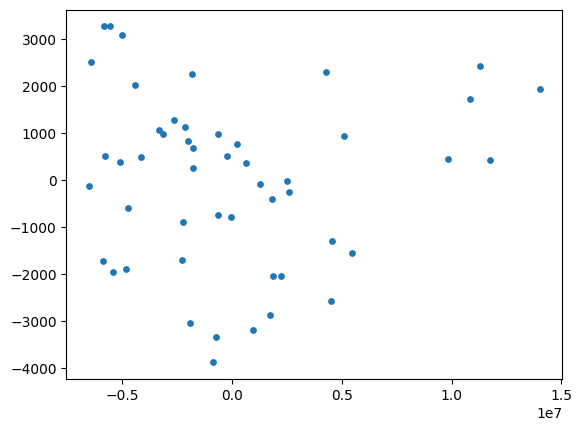

In [20]:
dots = []
make_house_params(dots)
copy_dot = [i for i in dots]
pca = PCA(n_components=2)
dots = pca.fit_transform(dots)
plt.scatter(dots[:, 0], dots[:, 1], s=15)
plt.show()

Метод PCA:

1)Прочитать данные и нормализовать их (например, центрировать каждую переменную относительно ее среднего значения).

2)Вычислить ковариационную матрицу данных.

3)Найти собственные векторы и собственные значения этой матрицы.

4)Отсортировать собственные значения по убыванию.

5)Выбрать первые k наибольших собственных значений и соответствующих им собственных векторов.

6)Проектировать исходные данные на пространство, образованное выбранными собственными векторами.

In [22]:
pred_pca = KMeans(n_clusters=3).fit_predict(copy_dot)
print(pred_pca)
#plt.scatter(copy_dots[:, 0], copy_dots[:, 1], c=pred_cpa, s=15)
#plt.show()

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 2 2 0 2 0 2 2]


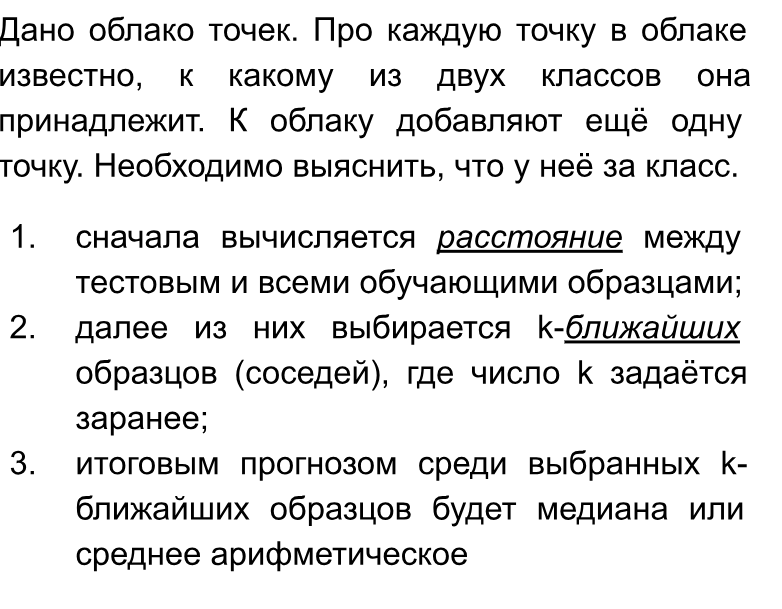

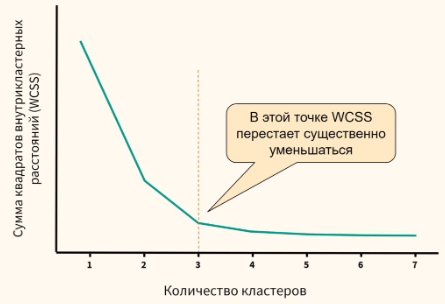

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0
 1 0 0 0 0 0 2 2 0 2 0 2 2]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 2 2 0 2 0 2 2]


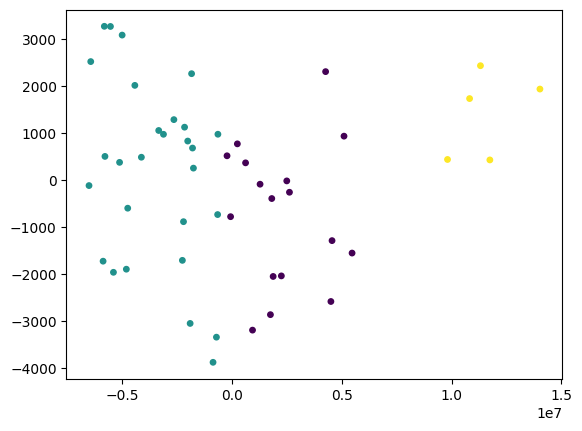

In [24]:
pred = KMeans(n_clusters=3).fit_predict(dots)
print(pred)
print(pred_pca)
plt.scatter(dots[:, 0], dots[:, 1], c=pred, s=15)
plt.show()